<a href="https://colab.research.google.com/github/team5INFO5731/INFO5731-FinalProject/blob/main/Topic_Modelling_on_ShortText_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Topic Modelling on ShortText**

In [4]:
''' This would be a short text dataset
This dataset can be downloaded from kaggle,
Data scraped from the Guardian Business contains the headlines and last updated date of articles from the end of December 2017 to July 19th, 2020 since the Guardian Business does not offer preview text.
Since only the short text as in a single line headline would be used in the modelling, hence the short text
'''
# Load data
import pandas as pd
input_df=pd.read_csv("/content/guardian_headlines.csv")
print(input_df.head())

        Time                                          Headlines
0  18-Jul-20   Johnson is asking Santa for a Christmas recovery
1  18-Jul-20  ‘I now fear the worst’: four grim tales of wor...
2  18-Jul-20  Five key areas Sunak must tackle to serve up e...
3  18-Jul-20  Covid-19 leaves firms ‘fatally ill-prepared’ f...
4  18-Jul-20  The Week in Patriarchy  \n\n\n  Bacardi's 'lad...


**EDA - Exploratory data analysis**

In [5]:
# Find the shape of the dataset
input_df.shape

(17800, 2)

In [6]:
# Find the basic info of the dataset, to check if there are any null values
input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17800 entries, 0 to 17799
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Time       17800 non-null  object
 1   Headlines  17800 non-null  object
dtypes: object(2)
memory usage: 278.2+ KB


**Data Cleaning**

In [7]:
#steps involving all the basic steps of preprocessing
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize  
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop_words=stopwords.words("english")
# cleaning the text data
input_df['cleaned_data'] = input_df['Headlines'].str.replace(r"\W", " ").str.strip()# 1.To remove special characters and punctuations
input_df['cleaned_data'] = input_df['cleaned_data'].str.replace(r'\d+',"") #2.To remove Numbers
input_df['cleaned_data'] = input_df['cleaned_data'].apply(lambda x: " ".join(x.lower() for x in x.split())) #convert the whole text into lower case
input_df['cleaned_data'] = input_df['cleaned_data'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words)) #remove all stop words
#input_df['cleaned text review'] # dataframe column that would be used for further process
input_df


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


,Time,Headlines,cleaned_data
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery,johnson asking santa christmas recovery
1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...,fear worst four grim tales working life upende...
2,18-Jul-20,Five key areas Sunak must tackle to serve up e...,five key areas sunak must tackle serve economi...
3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...,covid leaves firms fatally ill prepared deal b...
4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...,week patriarchy bacardi lady vodka latest long...
...,...,...,...
17795,17-Dec-17,How investing in solar energy can create a bri...,investing solar energy create brighter future ...
17796,17-Dec-17,Poundland suppliers hit by insurance downgrade,poundland suppliers hit insurance downgrade
17797,17-Dec-17,Cryptocurrencies: City watchdog to investigate...,cryptocurrencies city watchdog investigate new...
17798,17-Dec-17,Unilever sells household name spreads to KKR f...,unilever sells household name spreads kkr bn


In [8]:

from sklearn.feature_extraction.text import CountVectorizer
 
# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')
 
# apply transformation
tf = vectorizer.fit_transform(input_df['cleaned_data'] ).toarray()
 
# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

In [9]:
import sys
sys.path.insert(1,'/content/')

**LDA-Modelling**

In [10]:
import AlgorithmLDA as lda_ul
result = lda_ul.LDA_MODEL(10,tf,tf_feature_names,10)
result

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights,Topic 9 words,Topic 9 weights
0,trump,548.1,uk,643.1,pay,196.9,climate,241.1,may,249.8,bank,354.6,business,879.5,brexit,935.2,bn,390.4,finance,466.1
1,us,475.5,high,375.7,rail,161.7,uk,229.4,uk,221.6,guardian,223.5,live,824.8,uk,499.7,project,221.1,pratley,412.1
2,trade,412.1,year,330.8,faces,134.4,british,186.0,tax,207.1,england,184.8,happened,616.3,deal,430.6,energy,202.1,nils,412.1
3,china,360.1,business,273.1,mps,123.3,cut,169.7,britain,185.9,view,178.0,uk,555.2,new,304.6,green,183.1,johnson,170.1
4,world,305.3,street,193.9,bn,117.2,crisis,148.2,says,133.4,money,134.2,brexit,307.3,big,244.9,economists,180.1,collapse,163.1
5,war,225.1,observer,171.1,uk,108.2,chief,141.3,make,106.7,says,105.5,growth,248.9,economy,234.0,uk,170.4,carillion,139.3
6,global,219.3,lockdown,159.3,firms,107.4,jobs,141.0,public,105.2,report,98.7,rise,229.8,eu,203.3,firm,169.0,time,131.7
7,viewpoint,156.1,close,153.7,court,102.8,job,140.3,stop,97.8,uk,97.2,fears,229.0,could,157.9,syndicate,164.1,boris,110.1
8,markets,154.5,agenda,146.1,says,97.9,change,138.0,facebook,94.7,warns,94.5,prices,208.9,tech,150.7,owner,136.8,thomas,109.1
9,tariffs,151.1,jobs,134.4,bid,97.8,john,125.1,pay,93.3,profits,92.8,us,204.9,firms,122.8,coronavirus,129.5,cook,108.1


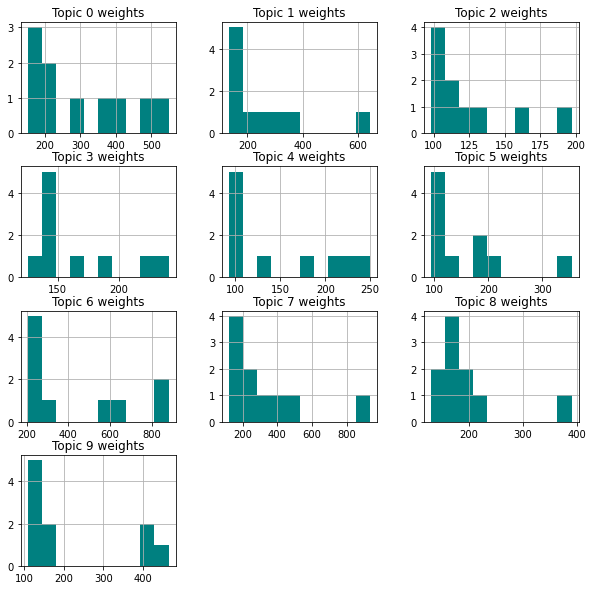

In [11]:
#plot graph
import matplotlib.pyplot as plt
columns_list = ["Topic "+str(i)+" weights" for i in range(0,10)]
for i in columns_list:
  result[i] = pd.to_numeric(result[i])
result.hist(figsize=(10,10),color = 'teal')
plt.show(block=False)

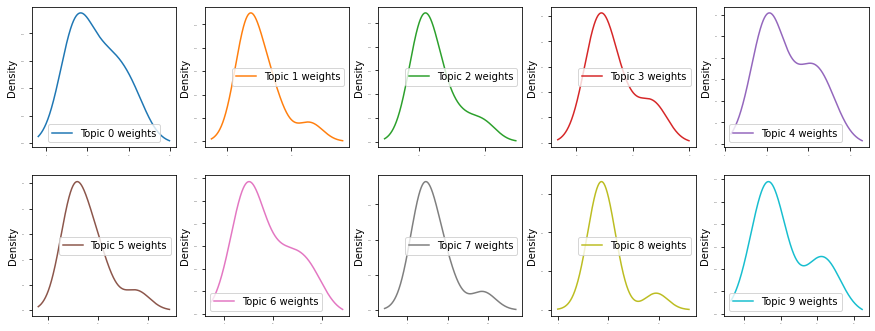

In [12]:
result.plot(kind='density', subplots=True,layout = (5,5),sharex=False, legend=True, fontsize=1,figsize=(15,15))
plt.show(block=False)

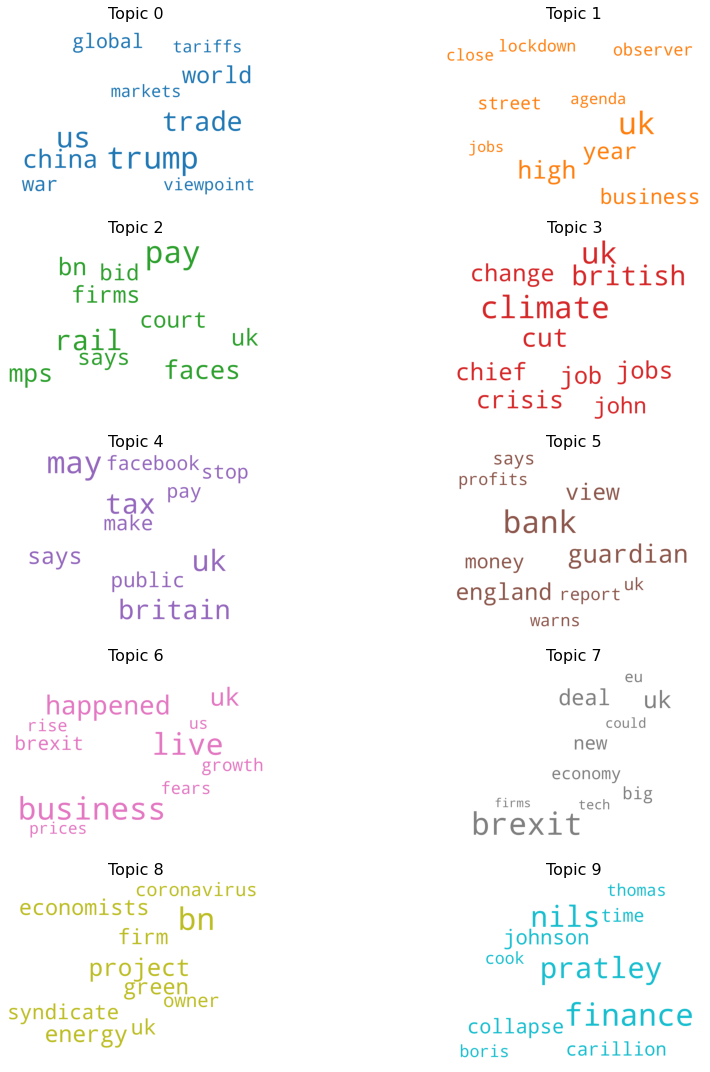

In [13]:
# Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
my_stopwords = nltk.corpus.stopwords.words('english')

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=my_stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

columns_list = ["Topic "+str(i)+" words" for i in range(0,10)]
topics = list()

for i in columns_list:
  topics.append(result[i].values)

frequencies = list()
columns_list = ["Topic "+str(i)+" weights" for i in range(0,10)]

for i in columns_list:
  frequencies.append(result[i].values)


fig, axes = plt.subplots(5,2, figsize=(15,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    size_of_array = len(topics[i])
    topic_words = dict()
    for j in range(size_of_array):
      topic_words[topics[i][j]] = frequencies[i][j]
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

**LSA TOPIC MODELLING**

In [14]:
import AlgorithmLSA as lsa
lsa_result=lsa.LSA_MODEL(tf,vectorizer)
lsa_result

,Topic 0,Topic 0 weights,Topic 1,Topic 1 weights,Topic 2,Topic 2 weights,Topic 3,Topic 3 weights,Topic 4,Topic 4 weights,Topic 5,Topic 5 weights,Topic 6,Topic 6 weights,Topic 7,Topic 7 weights,Topic 8,Topic 8 weights,Topic 9,Topic 9 weights,Topic 10,Topic 10 weights,Topic 11,Topic 11 weights,Topic 12,Topic 12 weights,Topic 13,Topic 13 weights,Topic 14,Topic 14 weights,Topic 15,Topic 15 weights,Topic 16,Topic 16 weights,Topic 17,Topic 17 weights,Topic 18,Topic 18 weights,Topic 19,Topic 19 weights
0,uk,0.631102,business,0.510650,brexit,0.818125,finance,0.532273,us,0.667194,says,0.589019,new,0.706521,coronavirus,0.680433,bn,0.754911,trump,0.515101,bank,0.622342,deal,0.447409,deal,0.397371,high,0.618602,project,0.419859,could,0.527322,pay,0.371158,crisis,0.531001,jobs,0.504540,guardian,0.467436
1,business,0.425569,live,0.403132,deal,0.313015,nils,0.507155,trade,0.275172,new,0.352005,bn,0.152795,crisis,0.231727,deal,0.298143,trade,0.311961,england,0.354729,bank,0.401957,business,0.382194,street,0.381425,economists,0.392077,jobs,0.483555,crisis,0.361719,could,0.372274,risk,0.176040,deal,0.399874
2,live,0.344426,happened,0.275414,guardian,0.119701,pratley,0.507155,china,0.240949,coronavirus,0.224192,coronavirus,0.075021,economy,0.178333,trump,0.133517,coronavirus,0.215916,interest,0.138402,england,0.260609,could,0.229059,year,0.209015,syndicate,0.375110,economy,0.240460,jobs,0.315981,covid,0.158505,trump,0.156529,view,0.381907
3,brexit,0.282288,us,0.120059,says,0.087305,us,0.251453,trump,0.239218,bank,0.199359,york,0.059222,us,0.125984,could,0.101032,china,0.191949,economy,0.134380,coronavirus,0.216378,observer,0.192955,project,0.160267,economy,0.179801,cut,0.182615,firms,0.181796,climate,0.146015,cut,0.133921,economy,0.347516
4,happened,0.236652,trade,0.074927,watch,0.086186,trade,0.095554,says,0.135768,bn,0.184116,guardian,0.056740,amid,0.109201,trade,0.084118,war,0.176803,trump,0.123698,happened,0.209911,agenda,0.184606,economists,0.151767,could,0.147940,pay,0.145901,cut,0.141846,jobs,0.111827,business,0.130585,high,0.112784
5,us,0.132082,markets,0.074391,finance,0.072704,trump,0.094627,war,0.127368,could,0.176924,high,0.056264,guardian,0.104651,pay,0.061397,project,0.166139,guardian,0.114189,live,0.207317,leader,0.127220,syndicate,0.145100,live,0.129787,risk,0.141205,covid,0.141834,amid,0.074364,coronavirus,0.122071,jobs,0.097064
6,deal,0.112910,trump,0.069590,economy,0.072502,china,0.092446,bn,0.096510,crisis,0.167515,deal,0.050824,project,0.081170,eu,0.055979,economists,0.160245,project,0.113351,interest,0.093204,jobs,0.104914,jobs,0.138899,deal,0.113273,trump,0.117961,trump,0.125490,financial,0.074285,bn,0.106937,crisis,0.089964


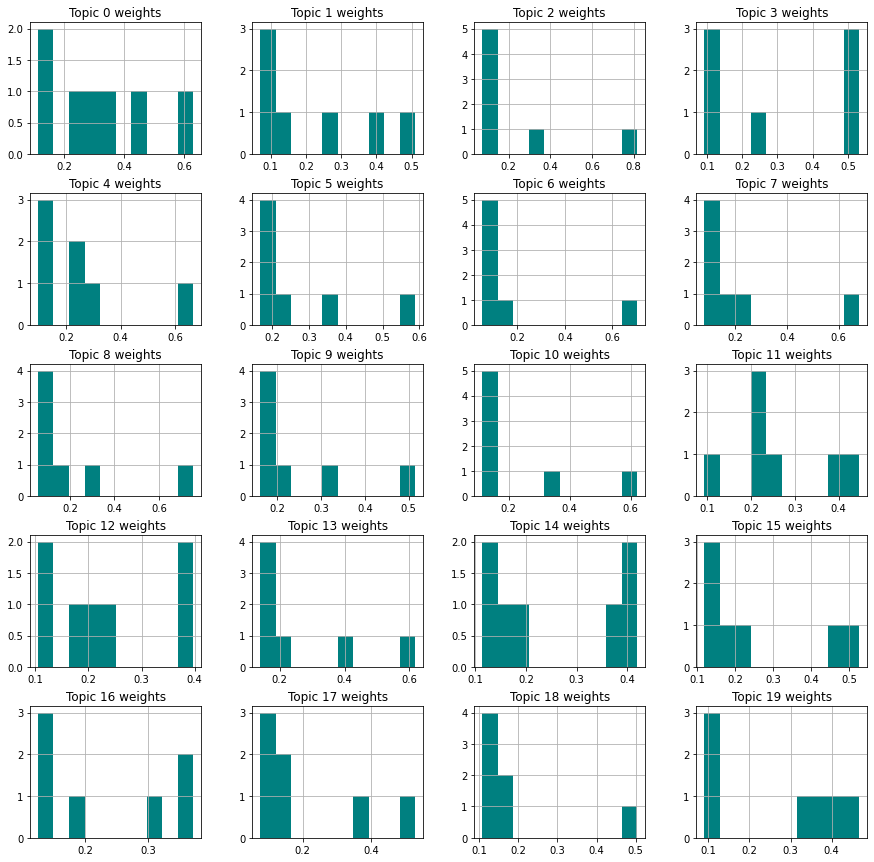

In [15]:
columns_list = ["Topic "+str(i)+" weights" for i in range(0,10)]
for i in columns_list:
  lsa_result[i] = pd.to_numeric(lsa_result[i])
lsa_result.hist(figsize=(15,15),color = 'teal')
plt.show(block=False)

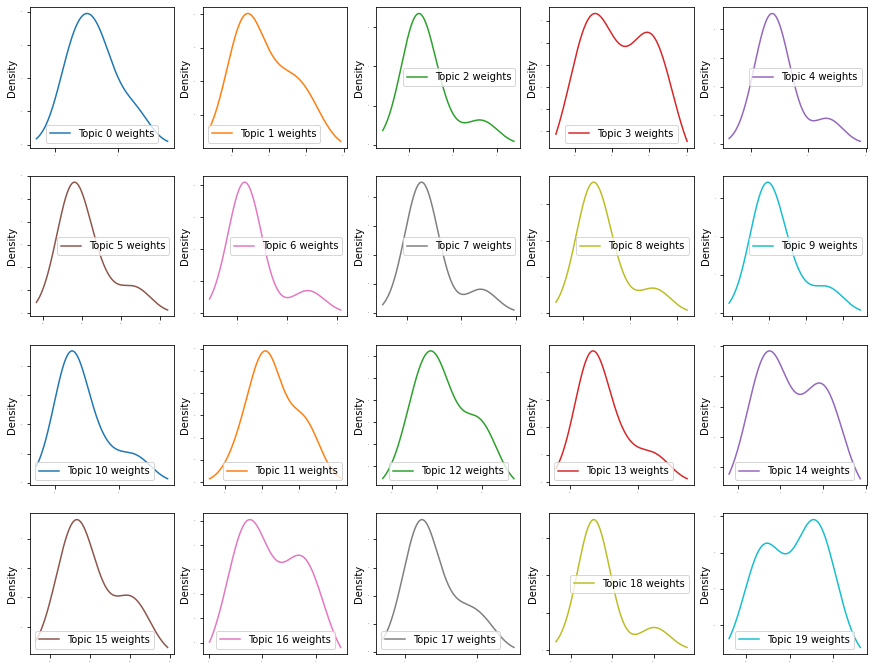

In [16]:
lsa_result.plot(kind='density', subplots=True,layout = (5,5),sharex=False, legend=True, fontsize=1,figsize=(15,15))
plt.show(block=False)

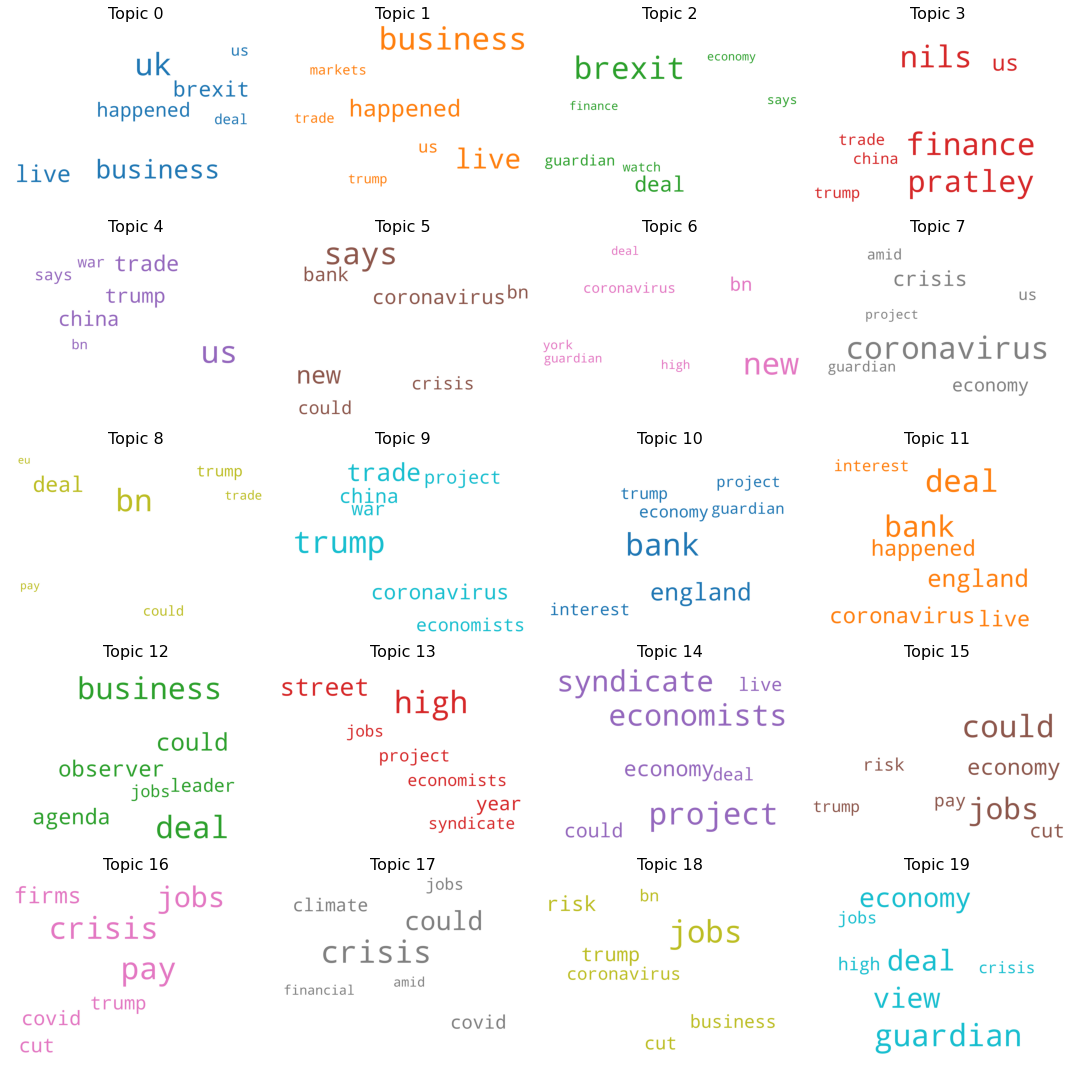

In [17]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
cols = cols*2
cloud = WordCloud(stopwords=my_stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

columns_list = ["Topic "+str(i) for i in range(0,20)]
topics = list()

for i in columns_list:
  topics.append(lsa_result[i].values)

frequencies = list()
columns_list = ["Topic "+str(i)+" weights" for i in range(0,20)]

for i in columns_list:
  frequencies.append(lsa_result[i].values)


fig, axes = plt.subplots(5,4, figsize=(15,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    size_of_array = len(topics[i])
    topic_words = dict()
    for j in range(size_of_array):
      topic_words[topics[i][j]] = frequencies[i][j]
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

**HMM-LDA TOPIC MODELLING**

In [30]:
import AlgorithmHMMLDA as HMMLDA

In [31]:
def get_reuters_token_list_by_sentence(num_doc,ip):
    corpus = [[i.split() for i in ip ]]
    print(corpus)
    valid_voca = set(w.lower() for w in nltk.corpus.words.words())
    stop = stopwords.words('english')
    valid_voca = valid_voca.union(stop)

    tmp_corpus = list()
    voca_dic = dict()
    voca = list()
    for doc in corpus:
        tmp_doc = list()
        for sent in doc:
            tmp_sent = list()
            for word in sent:
                if word in valid_voca:
                    tmp_sent.append(word)
                    if word not in voca_dic:
                        voca_dic[word] = len(voca_dic)
                        voca.append(word)
            if len(tmp_sent) > 0:
                tmp_doc.append(tmp_sent)
        if len(tmp_doc) > 0:
            tmp_corpus.append(tmp_doc)

    # convert token list to word index list
    corpus = list()
    for doc in tmp_corpus:
        new_doc = list()
        for sent in doc:
            new_sent = list()
            for word in sent:
                new_sent.append(voca_dic[word])
            new_doc.append(new_sent)
        corpus.append(new_doc)

    return np.array(voca), corpus

In [32]:
n_docs = 1000
voca, corpus = get_reuters_token_list_by_sentence(n_docs,input_df["cleaned_data"].values)

[[['johnson', 'asking', 'santa', 'christmas', 'recovery'], ['fear', 'worst', 'four', 'grim', 'tales', 'working', 'life', 'upended', 'covid'], ['five', 'key', 'areas', 'sunak', 'must', 'tackle', 'serve', 'economic', 'recovery'], ['covid', 'leaves', 'firms', 'fatally', 'ill', 'prepared', 'deal', 'brexit'], ['week', 'patriarchy', 'bacardi', 'lady', 'vodka', 'latest', 'long', 'line', 'depressing', 'gendered', 'products'], ['english', 'councils', 'call', 'smoking', 'ban', 'outside', 'pubs', 'cafes'], ['tesla', 'justify', 'bn', 'valuation'], ['empty', 'city', 'centres', 'sure', 'ever'], ['democratising', 'finance', 'investment', 'app', 'amateurs', 'student', 'trader', 'death'], ['homebuyer', 'loses', 'fraudsters', 'gets', 'back', 'step'], ['st', 'mawes', 'named', 'uk', 'top', 'seaside', 'resort', 'poll'], ['atol', 'protection', 'extended', 'vouchers', 'covid', 'cancellations'], ['leaseholders', 'billed', 'remove', 'grenfell', 'style', 'cladding'], ['boohoo', 'calls', 'licensing', 'scheme', '

In [33]:
n_voca = len(voca)
n_topic = 20
n_class = 20
max_iter = 100
model = HMMLDA.HMM_LDA(len(corpus), n_voca, n_topic, n_class, alpha=0.1, beta=0.1, gamma=0.1, eta=0.1, verbose=False)
model.fit(corpus, max_iter=max_iter)

In [34]:
def get_top_words(topic_word_matrix, vocab, topic, n_words=20):
    if not isinstance(vocab, np.ndarray):
        vocab = np.array(vocab)
    top_words = vocab[topic_word_matrix[topic].argsort()[::-1][:n_words]]
    return top_words

In [35]:
for ti in range(n_topic):
    top_words = get_top_words(model.TW, voca, ti, n_words=10)
    print('Topic', ti ,': ', ','.join(top_words))

Topic 0 :  overseas,domination,gallery,budget,high,risk,behind,mark,supply,care
Topic 1 :  aged,first,despite,splash,revolution,bad,chinese,record,closed,without
Topic 2 :  global,musk,scaled,act,slowdown,rising,project,syndicate,given,may
Topic 3 :  fruit,yet,bite,need,stopped,branch,relief,fast,removal,made
Topic 4 :  conservative,trump,runway,donald,america,g,buzz,video,holding,ahead
Topic 5 :  chinese,gove,remuneration,crisis,beside,clearing,dive,chase,berlin,mark
Topic 6 :  half,spree,times,sparks,risk,watch,project,budget,quarantine,reflect
Topic 7 :  time,forecast,money,investor,service,feast,triple,fight,zero,away
Topic 8 :  replace,insulin,firm,archaic,shortage,britain,first,right,despite,grab
Topic 9 :  media,irish,drive,error,exploitation,hit,root,view,trilogy,need
Topic 10 :  cat,effort,tech,react,coal,accused,property,added,face,zero
Topic 11 :  ken,aloof,feel,cling,pay,cleaner,become,chinese,loss,closed
Topic 12 :  already,geoff,effect,cause,food,america,across,trump,cour

**Supervised LDA TOPIC MODELLING**

In [ ]:
!pip install pymc

In [37]:
training_data = input_df['cleaned_data'].values

In [38]:
import nltk
from nltk import word_tokenize
from nltk.corpus import reuters, stopwords
from six.moves import xrange
from collections import Counter
import nltk
nltk.download('words')
import numpy as np

def get_ids_cnt(corpus, max_voca=9999999, remove_top_n=5):
    voca = set(w.lower() for w in nltk.corpus.words.words())
    stop = stopwords.words('english')

    docs = list()
    freq = Counter()

    for doc in corpus:
        if isinstance(doc, str):
            doc = word_tokenize(doc)
        elif not hasattr(doc, '__iter__'):
            raise Exception('Corpus is not a list of string or token list')

        # remove word using stopword list or single character word
        doc = [word.lower() for word in doc if word.lower() in voca and word.lower() not in stop and len(word) != 1]
        freq.update(doc)
        docs.append(doc)

    voca = [key for iter, (key, val) in enumerate(freq.most_common(max_voca)) if iter >= remove_top_n]

    voca_dic = dict()
    voca_list = list()
    for word in voca:
        voca_dic[word] = len(voca_dic)
        voca_list.append(word)

    doc_ids = list()
    doc_cnt = list()

    for doc in docs:
        words = set(doc)
        ids = np.array([int(voca_dic[word]) for word in words if word in voca_dic])
        cnt = np.array([int(doc.count(word)) for word in words if word in voca_dic])

        doc_ids.append(ids)
        doc_cnt.append(cnt)

    return np.array(voca_list), doc_ids, doc_cnt

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [39]:
voca, word_ids, word_cnt = get_ids_cnt(training_data)

In [40]:
def convert_cnt_to_list(word_ids, word_cnt):
    corpus = list()

    for di in xrange(len(word_ids)):
        doc = list()
        doc_ids = word_ids[di]
        doc_cnt = word_cnt[di]
        for wi in xrange(len(doc_ids)):
            word_id = doc_ids[wi]
            for si in xrange(doc_cnt[wi]):
                doc.append(word_id)
        corpus.append(doc)
    return corpus

In [41]:
corpus = convert_cnt_to_list(word_ids, word_cnt)

In [42]:
import AlgorithmsupervisedLDA as slda

In [43]:
n_doc = len(corpus)
n_voca = voca.size

In [44]:
n_doc

17800

In [45]:
import random
#fit artificial sevearity
sevearity = [random.randint(0,5) for i in range(0,17800)]

In [46]:
model = slda.SupervisedLDA(n_doc, n_voca, 10, sigma=0.01)
model.fit(corpus, sevearity)

In [47]:
for ti in model.eta.argsort():
    top_words = get_top_words(model.TW, voca, ti, n_words=10)
    print('Eta', model.eta[ti] ,'\nTopic', ti ,':\t', ','.join(top_words))

Eta -5.105961363817524 
Topic 9 :	 may,trump,crisis,back,finance,economy,high,oil,long,observer
Eta -3.791118768185076 
Topic 8 :	 high,trump,china,could,energy,retail,crisis,report,industry,growth
Eta -2.133039951253826 
Topic 5 :	 trump,pay,british,staff,first,boss,view,rise,green,observer
Eta -1.2606198206865813 
Topic 4 :	 trade,nils,finance,war,could,may,year,risk,chief,day
Eta -0.06754672402835521 
Topic 3 :	 economy,first,year,growth,guardian,high,could,covid,economic,house
Eta 1.0633510413350846 
Topic 7 :	 nils,finance,could,crisis,power,climate,britain,industry,may,plan
Eta 2.1958416507372287 
Topic 2 :	 high,street,viewpoint,cut,oil,year,firm,record,market,despite
Eta 2.8099234187688924 
Topic 1 :	 trump,nils,trade,war,finance,pay,politics,guardian,china,eu
Eta 3.688034320315146 
Topic 6 :	 pay,economy,could,crisis,high,bank,oil,amid,trump,year
Eta 6.426833836056206 
Topic 0 :	 finance,bank,trade,economy,nils,could,china,trump,pay,growth


**Bi-Term TOPIC MODELLING**

In [ ]:
!pip install biterm

In [49]:
import sys
sys.path.insert(1,'/content/')
import AlgorithmBITERM as btm_model
topics = btm_model.BITERM_MODEL(tf,vectorizer)

100%|██████████| 100/100 [32:56<00:00, 19.77s/it]
/content/AlgorithmBITERM.py:8: RuntimeWarning: invalid value encountered in true_divide
  topics = btm.fit_transform(biterms, iterations=100)


In [50]:
topics

array([[9.21642266e-01, 2.63587505e-08, 2.20925562e-08, ...,
        8.44531366e-05, 2.45052318e-04, 5.94963047e-04],
       [6.51458898e-01, 3.27584927e-06, 3.88261454e-06, ...,
        4.91435486e-05, 7.71813572e-06, 1.18654200e-07],
       [5.70549543e-01, 4.10069097e-06, 3.58661301e-07, ...,
        9.59913449e-02, 1.85266805e-08, 1.49456524e-07],
       ...,
       [3.04966232e-01, 2.36650684e-05, 1.03062722e-08, ...,
        1.80704138e-05, 2.47818131e-04, 7.22205943e-08],
       [5.99203114e-01, 2.95975469e-07, 2.48071496e-07, ...,
        1.34577873e-04, 2.15485996e-07, 1.73834637e-06],
       [4.82712106e-01, 3.23936254e-08, 2.71506796e-08, ...,
        1.05442264e-02, 2.35842945e-08, 1.90256785e-07]])

In [51]:
texts= input_df['cleaned_data'].values
for i in range(len(texts)):
        print("{} (topic: {})".format(texts[i], topics[i].argmax()))

Streaming output truncated to the last 5000 lines.
energy bills customers find save (topic: 3)
ten years fed failings lehman brothers clear (topic: 11)
berkeley calls affordable housing targets unviable chairman earns (topic: 0)
harley davidson lovers milwaukee discuss trump tariffs time (topic: 0)
chinese billionaire ceo richard liu arrested us accused sexual offence (topic: 16)
higher minimum wage boost economy cities smith institute (topic: 0)
women still hold tiny minority senior roles financial services (topic: 0)
charlotte valeur succeeds barbara judge iod chair (topic: 0)
guardian view education things money buy (topic: 0)
ashley faces potential revolt sports direct annual meeting (topic: 9)
britain loses medicines contracts eu body anticipates brexit (topic: 0)
michel barnier says strongly opposes may brexit trade proposals (topic: 0)
manchester science festival partners withdraw shell sponsorship (topic: 0)
economics viewpoint trump wto threats matter especially post brexit br